Introduction:

google play stor is a official app store by Google. It allows users to browse and download Apps through Google. I will use Python with some packages to analyze the google play store and google play store user reviews datasets which includes data for many Apps will be studied here. The dataset was collected in 2010 till 2018. I will analyze this dataset to get and understanding of google play store and be able to compare different aspects of them.

Hypothesis:
Also, I want to evaluate this hyphothesis: Apps with Paid type has higher Rating compred to free Apps.
For evaluating A/B test hypothesis use T-test.
First I do EDA with installs, reviews,etc. for free vs paid Apps then form the hypothesis and evaluate it. Then compare Apps Paid type with Installs, Reviews,etc., as a secondary metrics for sure to get a correct result. now is correct or remove last line?????


In [1]:
# Import some packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import scipy
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import scipy.stats 
import seaborn as sns
from datetime import datetime,date
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read two csv files: 
googleplaystor = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\google-play-store-apps\googleplaystore.csv')
googleplaystore_user_reviews = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\google-play-store-apps\googleplaystore_user_reviews.csv')

In [3]:
# Merge two files:
df = pd.merge(googleplaystor,googleplaystore_user_reviews, on ='App')

Now, In the following section, I am planning to do EDA, first with cleaning the dataset and convert to correct format:???

In [4]:
# Convert all characters to lower and replace space to underline in column's index then look at the columns in the dataset:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index([u'app', u'category', u'rating', u'reviews', u'size', u'installs',
       u'type', u'price', u'content_rating', u'genres', u'last_updated',
       u'current_ver', u'android_ver', u'translated_review', u'sentiment',
       u'sentiment_polarity', u'sentiment_subjectivity'],
      dtype='object')

In [5]:
# look at the dataset:
df.head(60)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000


In [6]:
# Look at the bottom of the dataset:
df.tail()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
122657,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122658,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.20,0.20
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.00,0.00
122661,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,It's good best gallery phone,Positive,0.85,0.45


In [7]:
# Find Length of dataset:
len(df)

122662

In [8]:
# Knowing number of rows and columns:
print(df.shape)

(122662, 17)


In [9]:
# Clean dataset by droping duplicates:  
# Look at the length of dataset after removing duplicates:
df.drop_duplicates(inplace=True) 
len(df)

41661

In [10]:
# Find number of null in each columns:
# df.isna().sum
df.isnull().sum()

app                          0
category                     0
rating                      39
reviews                      0
size                         0
installs                     0
type                         0
price                        0
content_rating               0
genres                       0
last_updated                 0
current_ver                  0
android_ver                  0
translated_review         1247
sentiment                 1239
sentiment_polarity        1239
sentiment_subjectivity    1239
dtype: int64

In [11]:
# Fill null value in type by Free
df['type'].fillna('Free',inplace=True)

In [12]:
# Find out number of uniquevalue and notnull in each columns:
df.nunique()

app                        1020
category                     33
rating                       23
reviews                    1330
size                        178
installs                     13
type                          2
price                        14
content_rating                5
genres                       73
last_updated                299
current_ver                 598
android_ver                  25
translated_review         26682
sentiment                     3
sentiment_polarity         6060
sentiment_subjectivity     4434
dtype: int64

In [13]:
# Drop all NAN cell from dataset:
df.dropna(inplace=True)

In [14]:
# Look at the length of dataset after droping:
len(df)

40376

In [15]:
# Look at the sample of dataset(number of sample:len of df * frace number):
df.sample(frac= 0.0001)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
45443,Helix Jump,GAME,4.2,1497361,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up,It's good game much need update. There ads die...,Positive,0.089103,0.366667
58928,Farm Heroes Saga,GAME,4.4,7614271,70M,"100,000,000+",Free,0,Everyone,Casual,"July 26, 2018",5.1.8,2.3 and up,"Very nice and fun game, because the joy that c...",Positive,0.159167,0.429167
66730,Chapters: Interactive Stories,GAME,4.5,73539,96M,"1,000,000+",Free,0,Mature 17+,Role Playing,"August 2, 2018",1.3.3,4.3 and up,I want HAVE spend money maker decisions I want...,Neutral,0.000000,0.000000
98741,Golf GPS Rangefinder: Golf Pad,SPORTS,4.6,13098,Varies with device,"1,000,000+",Free,0,Everyone,Sports,"July 28, 2018",Varies with device,Varies with device,This fantastic! Almost good rangefinder easier...,Positive,0.600000,0.750000


In [16]:
# Finding 'M' inside reviews column then drop it:
df[df['reviews'].str.contains('M')]
df.drop(df.index[10472],inplace=True)

In [17]:
# Delete the row with the Category='1.9'(It is wrong category):
df= df[df.category != '1.9']

In [18]:
'''Correct Installs Format'''
# Correct format of installs column by removing '+' and ',' ,then convert to the numeric (Float) type: 
# In numeric function 'coerce' means that the values cannot convert, change to NAN.
df['installs']=df['installs'].apply(lambda x: str(x).strip('+'))
df['installs']=df['installs'].apply(lambda x: str(x).replace(',',''))
df['installs']=pd.to_numeric(df['installs'], errors='coerce')
df['installs'].value_counts()

10000000      9045
1000000       7989
100000000     7357
5000000       4558
100000        3024
50000000      2947
500000        2486
1000000000    1112
50000          687
10000          599
500000000      534
1000            37
Name: installs, dtype: int64

In [19]:
'''Correct Price Format'''
# Correct format of Price column by removing '$', then convert to the Float type: 
df["price"] = df["price"].apply(lambda x: x.replace('$', ''))
df["price"] = df["price"].astype("float")
df['price'].value_counts()

0.00     40005
9.99        77
3.99        72
0.99        62
11.99       40
29.99       40
4.99        39
2.49        37
6.99         3
Name: price, dtype: int64

In [20]:
'''Correct Size Format'''
# Correct format of Size column by changing 'K','M','+' ,then convert to the Float type: 
df["size"] = df["size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df["size"] = df["size"].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df["size"] = df["size"].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df["size"] = df["size"].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df["size"] = df["size"].astype(float)

In [21]:
'''Correct Reviews Format'''
# Correct format of Reviews column by changing 'K','M','+' ,then convert to the Float type:
df['reviews'] = df.reviews.replace('NAN',np.nan)
df['reviews'] = df.reviews.str.replace('k','e+3')
df['reviews'] = df.reviews.str.replace('M','e+6')
df['reviews'] = df.reviews.replace('1,000+',1000)
df['reviews'] = df.reviews.astype(float)

In [22]:
'''Correct Andoroid Version Format'''
# Correct format of Android Ver column by split'and' and take first section, then convert to the numeric (Float) type: 
df['android_ver']=df['android_ver'].replace('Varies with device',np.nan)
df['android_ver']=df['android_ver'].apply(lambda x:str(x).split('and')[0])
df['android_ver']=pd.to_numeric(df['android_ver'], errors='coerce')

In [23]:
'''Correct Curent Version Format'''
# Correct format of Android Ver column by split'and' and take first section, then convert to the numeric (Float) type:  
df['current_ver']=df['current_ver'].replace('Varies with device',np.nan)
df['current_ver']=df['current_ver'].apply(lambda x:str(x).split('and')[0])
df['current_ver']=pd.to_numeric(df['current_ver'], errors='coerce')

In [24]:
'''Convert Last Updated Format'''
# Convert the Last Updated column to the pandas datetime format, then look at the column:
df['last_updated']= pd.to_datetime(df['last_updated'])
df['last_updated'].head()

0   2018-01-15
1   2018-01-15
2   2018-01-15
4   2018-01-15
5   2018-01-15
Name: last_updated, dtype: datetime64[ns]

In [25]:
# Take a difference between latest Last Updated with Last updated column to see how many days were spent after last updated:
df['last_updated_days'] = max(df['last_updated'])-df['last_updated']
df['last_updated_days'].head()

0   204 days
1   204 days
2   204 days
4   204 days
5   204 days
Name: last_updated_days, dtype: timedelta64[ns]

In [26]:
# Look at the type of columns:
df.dtypes

app                                object
category                           object
rating                            float64
reviews                           float64
size                              float64
installs                            int64
type                               object
price                             float64
content_rating                     object
genres                             object
last_updated               datetime64[ns]
current_ver                       float64
android_ver                       float64
translated_review                  object
sentiment                          object
sentiment_polarity                float64
sentiment_subjectivity            float64
last_updated_days         timedelta64[ns]
dtype: object

In [27]:
# Look at the sample of dataset:
df.sample(7)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,last_updated_days
101988,Flightradar24 Flight Tracker,TRAVEL_AND_LOCAL,4.3,171889.0,NaN,10000000,Free,0.0,Everyone,Travel & Local,2018-07-18,NaN,NaN,"I found inaccurate. Flights overhead radar, sk...",Negative,-1.000000e-01,0.500000,20 days
519,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,NaN,NaN,Confusing use. It's difficult I like general.,Negative,-2.500000e-01,0.633333,24 days
118517,Financial Times,NEWS_AND_MAGAZINES,4.2,27104.0,8.2,1000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,NaN,4.4,Updating review. The good used years ago. It k...,Positive,1.666667e-02,0.800000,4 days
47736,Block Puzzle,GAME,4.6,59907.0,7.8,5000000,Free,0.0,Everyone,Puzzle,2018-03-06,2.90,2.3,"I really like game many ads. The game, so anno...",Negative,-1.800000e-01,0.480000,154 days
108571,Best Wallpapers QHD,PERSONALIZATION,4.4,294701.0,5.1,10000000,Free,0.0,Teen,Personalization,2018-03-17,2.85,NaN,"Super, fine fantastic ... Loved it! !",Positive,5.375000e-01,0.716667,143 days
121888,Hay Day,FAMILY,4.5,10053186.0,94.0,100000000,Free,0.0,Everyone,Casual,2018-06-28,NaN,NaN,I level 13. This game looks good. Maybe I old ...,Negative,-2.775558e-17,0.400000,40 days
85397,Etsy: Handmade & Vintage Goods,SHOPPING,4.3,95520.0,15.0,10000000,Free,0.0,Teen,Shopping,2018-08-03,NaN,4.1,Good,Positive,7.000000e-01,0.600000,4 days


In [28]:
# Exploring Nulls and type of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40375 entries, 0 to 122661
Data columns (total 18 columns):
app                       40375 non-null object
category                  40375 non-null object
rating                    40375 non-null float64
reviews                   40375 non-null float64
size                      26485 non-null float64
installs                  40375 non-null int64
type                      40375 non-null object
price                     40375 non-null float64
content_rating            40375 non-null object
genres                    40375 non-null object
last_updated              40375 non-null datetime64[ns]
current_ver               5630 non-null float64
android_ver               23231 non-null float64
translated_review         40375 non-null object
sentiment                 40375 non-null object
sentiment_polarity        40375 non-null float64
sentiment_subjectivity    40375 non-null float64
last_updated_days         40375 non-null timedelta64[ns]
dty

In [29]:
# Get statistical information summary for numerical columns:
df.describe()

,rating,reviews,size,installs,price,current_ver,android_ver,sentiment_polarity,sentiment_subjectivity,last_updated_days
count,40375.000000,4.037500e+04,26485.000000,4.037500e+04,40375.000000,5.630000e+03,23231.000000,40375.000000,40375.000000,40375
mean,4.324649,2.199112e+06,32.680733,5.906786e+07,0.076899,4.094370e+03,4.100637,0.168108,0.495103,118 days 05:10:43.140557
std,0.285918,7.457775e+06,27.712409,1.714354e+08,1.131892,2.689831e+05,0.751101,0.343302,0.250467,274 days 15:32:24.041600
min,2.600000,4.600000e+01,0.008301,1.000000e+03,0.000000,1.000000e+00,1.500000,-1.000000,0.000000,0 days 00:00:00
25%,4.200000,1.703000e+04,9.600000,1.000000e+06,0.000000,1.800000e+00,4.100000,0.000000,0.373333,7 days 00:00:00
50%,4.400000,1.114500e+05,24.000000,1.000000e+07,0.000000,3.000000e+00,4.100000,0.136364,0.512963,22 days 00:00:00
75%,4.500000,1.468638e+06,52.000000,5.000000e+07,0.000000,4.813000e+00,4.400000,0.388889,0.645985,75 days 00:00:00
max,4.900000,7.815831e+07,99.000000,1.000000e+09,29.990000,2.018061e+07,7.100000,1.000000,1.000000,2596 days 00:00:00


As shown above, the average(mean) of Rating of App is 4.3. The median(50%) for the Rating is 4.4 which means that half the App have Rating less than this number and for the rest above it. The average number of Installs of App is 5,9067,860. The median(50%) for the number of Installs is 10,000,000. 

In [30]:
# See relation between numeric columns:
df.corr()

,rating,reviews,size,installs,price,current_ver,android_ver,sentiment_polarity,sentiment_subjectivity
rating,1.000000,0.069051,0.201098,0.008561,-0.018761,0.009629,0.025023,0.075374,0.071478
reviews,0.069051,1.000000,0.487488,0.560532,-0.019967,-0.004102,-0.034540,-0.094346,-0.007621
size,0.201098,0.487488,1.000000,0.251765,-0.031680,0.003494,0.107689,-0.187172,0.008191
installs,0.008561,0.560532,0.251765,1.000000,-0.023373,-0.005492,0.010388,-0.053705,-0.004536
price,-0.018761,-0.019967,-0.031680,-0.023373,1.000000,-0.001732,-0.023923,0.022081,-0.000561
current_ver,0.009629,-0.004102,0.003494,-0.005492,-0.001732,1.000000,0.003612,0.009325,0.004599
android_ver,0.025023,-0.034540,0.107689,0.010388,-0.023923,0.003612,1.000000,0.015354,-0.020553
sentiment_polarity,0.075374,-0.094346,-0.187172,-0.053705,0.022081,0.009325,0.015354,1.000000,0.244173
sentiment_subjectivity,0.071478,-0.007621,0.008191,-0.004536,-0.000561,0.004599,-0.020553,0.244173,1.000000


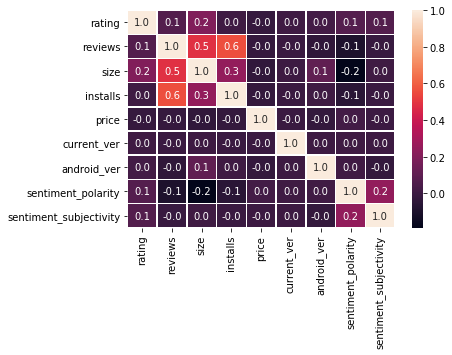

In [31]:
# Visualization has been used to better demonstrate the results:
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

As you can see, there are only fairly relationship between Installs and Reviews with 0.6 and Size and Reviews with 0.5.

Now, In the following steps, I am planning to explore the dataset and looking for something that provokes a hypothesis, specifically one that can be answered with an experiment.

????????? A rollout plan showing how you would implement and rollout the experiment?????? how to answer this part ?????? is it correct????
I am planing to compare the Apps with Free and Paid type and evaluate the Rating, Installs and Review of them.  

#### this should be done after your EDA and hypo
#### We will have an A/B test for 2 weeks that will keep track of new installs of paid vs free app users and their ratings. Our alpha level will be 0.05. 


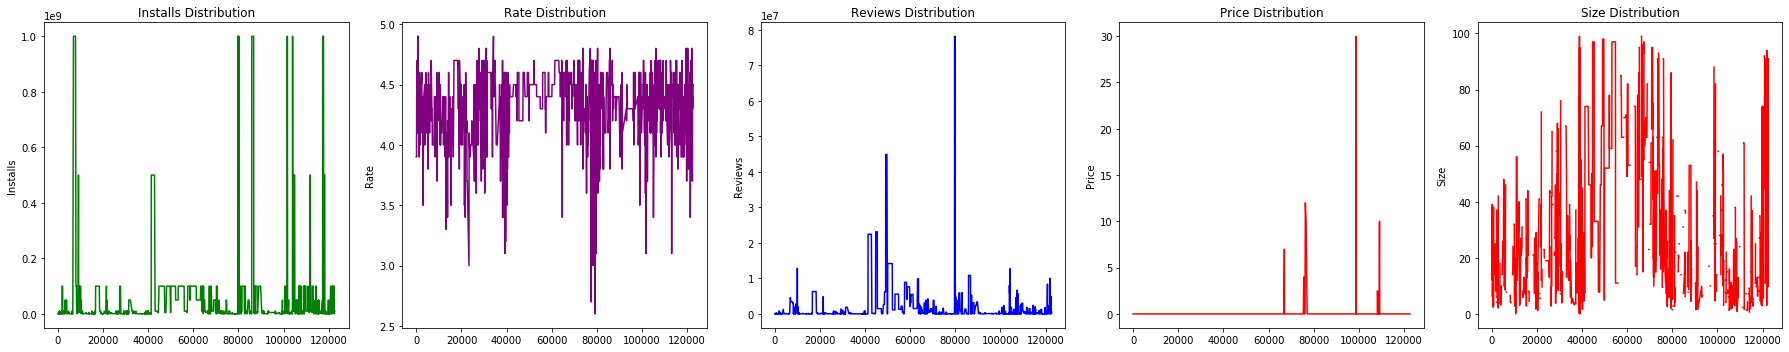

In [32]:
# Using subplot to demonstrate distribution of Installs, Rating, Reviews, Price and Size:
plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
plt.plot(df['installs'], color='green')
plt.ylabel('Installs')
plt.title('Installs Distribution')

plt.subplot(1, 5, 2)
plt.plot(df['rating'], color='purple')
plt.ylabel('Rate')
plt.title('Rate Distribution')

plt.subplot(1, 5, 3)
plt.plot(df['reviews'], color='blue')
plt.ylabel('Reviews')
plt.title('Reviews Distribution')

plt.subplot(1, 5, 4)
plt.plot(df['price'], color='red')
plt.ylabel('Price')
plt.title('Price Distribution')

plt.subplot(1, 5, 5)
plt.plot(df['size'], color='red')
plt.ylabel('Size')
plt.title('Size Distribution')

plt.tight_layout()
plt.show()

In [1]:
##??? how to describe???
### you need to do a hist for all. 
plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
plt.plot(df['installs'], color='green')
plt.ylabel('Installs')
plt.title('Installs Distribution')

plt.subplot(1, 5, 2)
plt.plot(df['rating'], color='purple')
plt.ylabel('Rate')
plt.title('Rate Distribution')

plt.subplot(1, 5, 3)
plt.plot(df['reviews'], color='blue')
plt.ylabel('Reviews')
plt.title('Reviews Distribution')

plt.subplot(1, 5, 4)
plt.plot(df['price'], color='red')
plt.ylabel('Price')
plt.title('Price Distribution')

plt.subplot(1, 5, 5)
plt.plot(df['size'], color='red')
plt.ylabel('Size')
plt.title('Size Distribution')

plt.tight_layout()
plt.show()



NameError: name 'df' is not defined

As you can see, Rate and Size have wide spread. ???? correct?? 

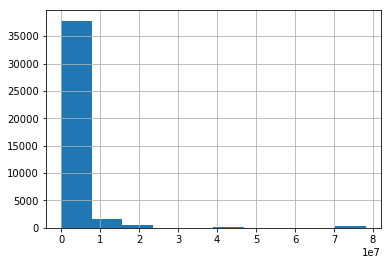

In [33]:
df.reviews.hist()

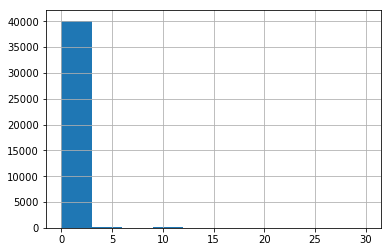

In [35]:
df.price.hist()

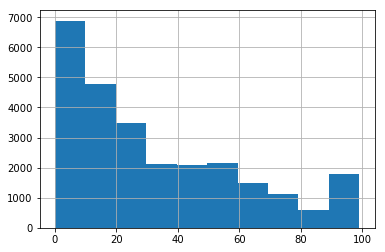

In [42]:
df['size'].hist()

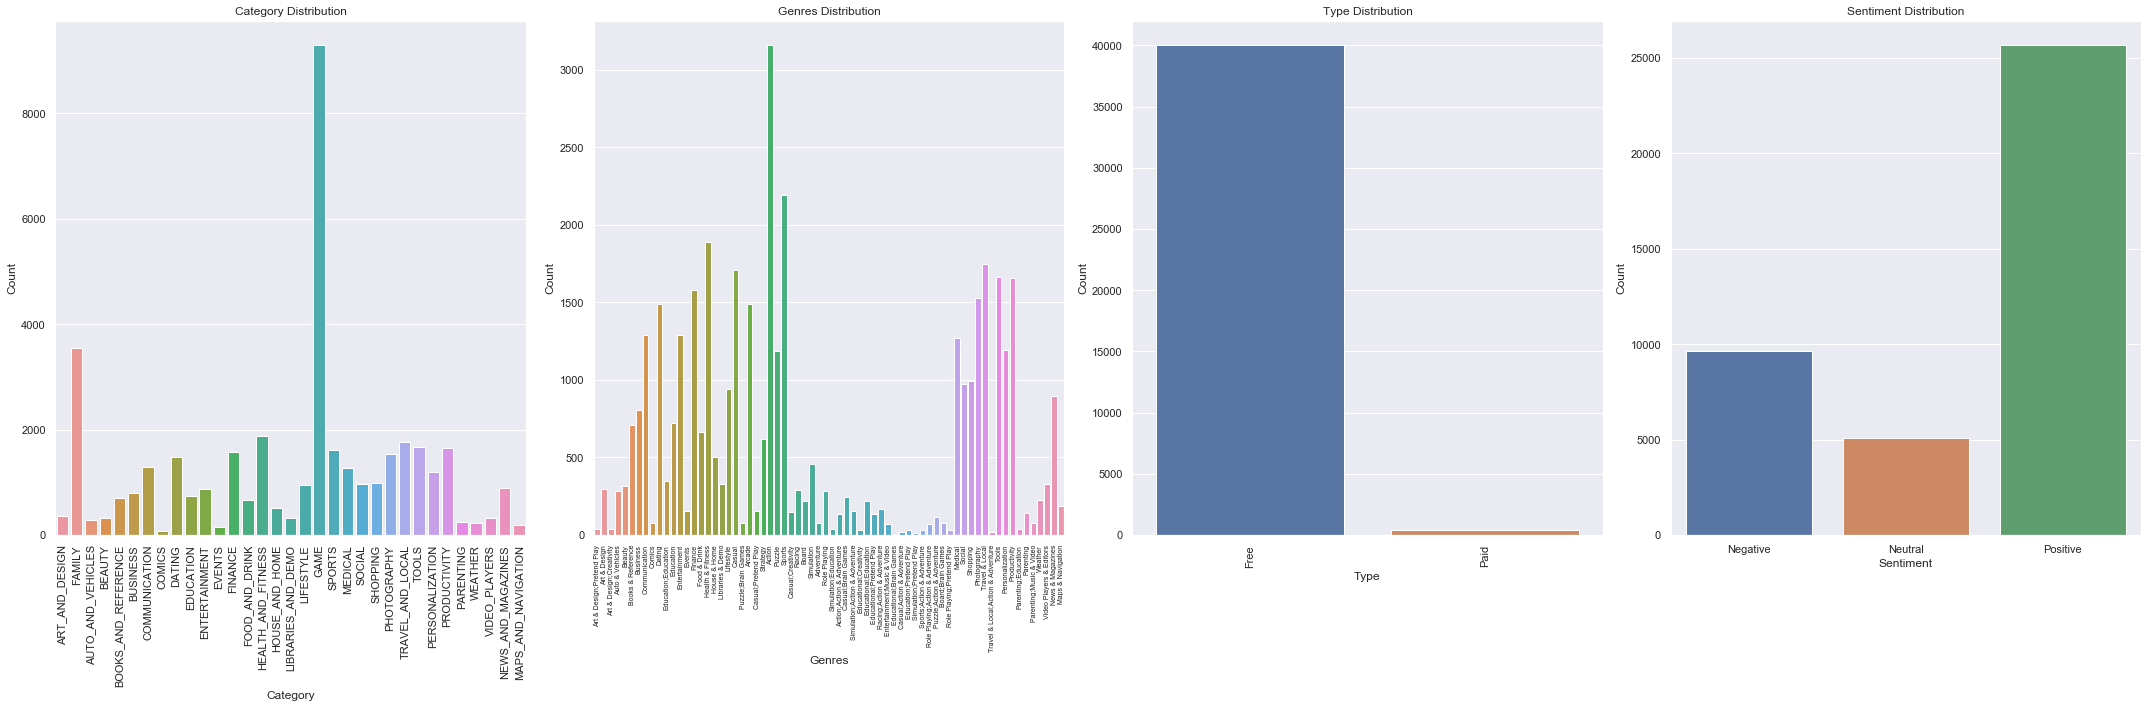

In [34]:
# Using subplot to visualize Distribution of Category, Genres, Type and Sentiment:
plt.figure(figsize=(30, 10))
sns.set(style='darkgrid')

plt.subplot(1, 4, 1)
g = sns.countplot('category', data=df)
g.set(xlabel='Category',  ylabel='Count', title='Category Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 4, 2)
g=sns.countplot('genres', data=df)
g.set(xlabel='Genres',  ylabel='Count', title='Genres Distribution')
plt.xticks(rotation=90, fontsize=7)

plt.subplot(1, 4, 3)
g=sns.countplot('type', data=df)
g.set(xlabel='Type',  ylabel='Count', title='Type Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 4, 4)
g=sns.countplot('sentiment', data=df)
g.set(xlabel='Sentiment', ylabel='Count', title='Sentiment Distribution')


plt.tight_layout()
plt.show()

As you can see the GAME category and ACTION genres has more Apps. Also the number of Free apps and Positive sentiment is higher.

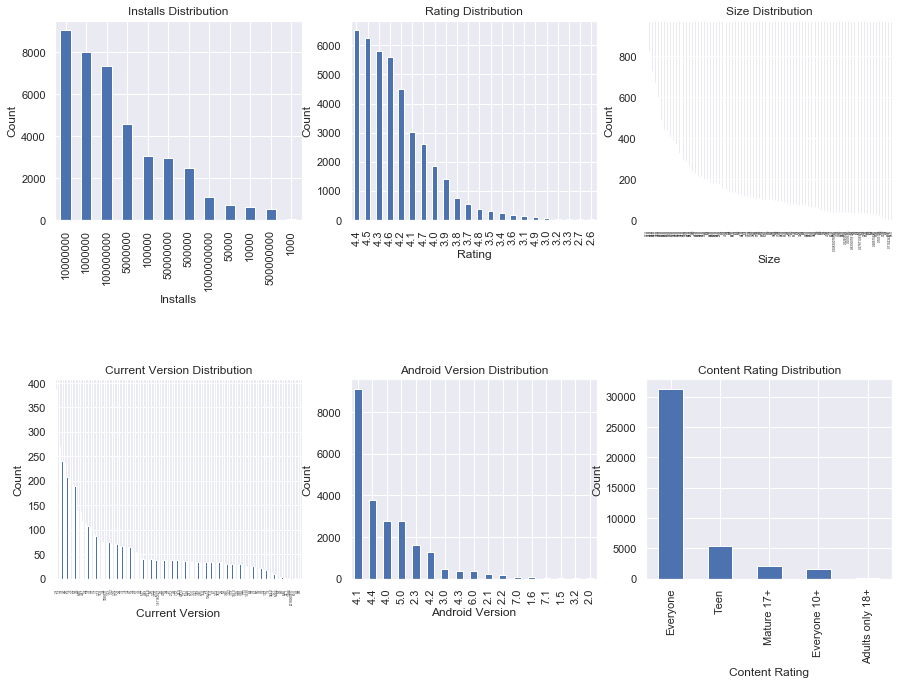

In [35]:
# Using barplot to demonstrate distribution of Installs, Rating, Size, Current Ver, Android ver, Content Rating: 
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
g=df['installs'].value_counts().plot(kind='bar')
g.set(xlabel='Installs',  ylabel='Count', title='Installs Distribution')
plt.xticks(rotation=90)

plt.subplot(2,3,2)
g=df['rating'].value_counts().plot(kind='bar')
g.set(xlabel='Rating',  ylabel='Count', title='Rating Distribution')
plt.xticks(rotation=90)

plt.subplot(2,3,3)
g=df['size'].value_counts().plot(kind='bar')
g.set(xlabel='Size',  ylabel='Count', title='Size Distribution')
plt.xticks(rotation=90, fontsize=3)

plt.subplot(2,3,4)
g=df['current_ver'].value_counts().plot(kind='bar')
g.set(xlabel='Current Version',  ylabel='Count', title='Current Version Distribution')
plt.xticks(rotation=90, fontsize=3)

plt.subplot(2,3,5)
g=df['android_ver'].value_counts().plot(kind='bar')  
g.set(xlabel='Android Version',  ylabel='Count', title='Android Version Distribution')
plt.xticks(rotation=90)

plt.subplot(2,3,6)
g=df['content_rating'].value_counts().plot(kind='bar')
g.set(xlabel='Content Rating',  ylabel='Count', title='Content Rating Distribution')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.8, top = 0.9)
plt.show()

As you can see, highest number of Installs, Rating, Size, Current Ver, Android Ver and Content Rating are 10,000,000 , 4.1, 97,000,000, 2.9, 4.1, Everyone respectively.

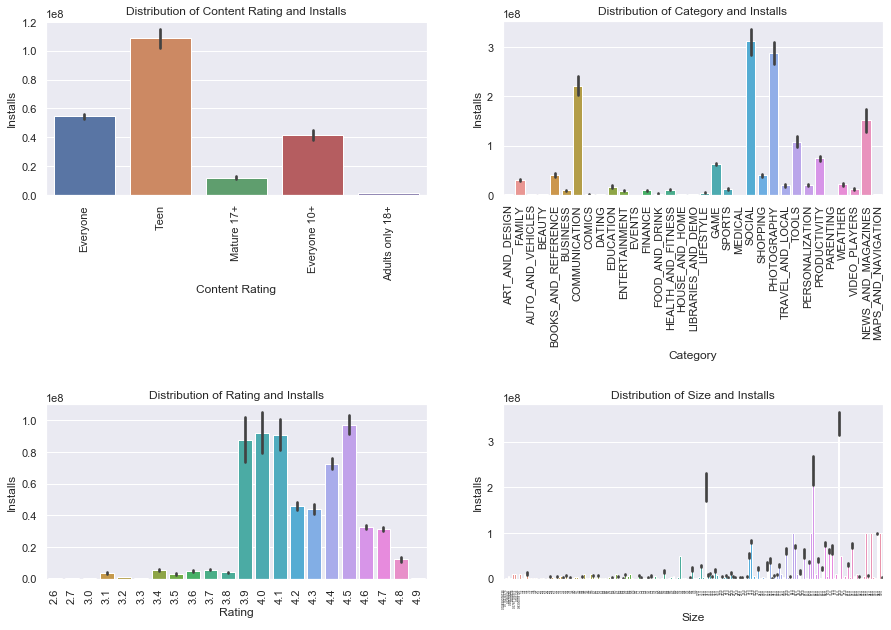

In [36]:
# Using barplot to demonstrate distribution of Content Rating, Category, Rating, Size by Installs: 
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
g=sns.barplot(df['content_rating'],df['installs'])
g.set(xlabel='Content Rating',  ylabel='Installs', title='Distribution of Content Rating and Installs')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
g=sns.barplot(df['category'],df['installs'])
g.set(xlabel='Category',  ylabel='Installs', title='Distribution of Category and Installs')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
g=sns.barplot(df['rating'],df['installs'])
g.set(xlabel='Rating',  ylabel='Installs', title='Distribution of Rating and Installs')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
g=sns.barplot(df['size'],df['installs'])
g.set(xlabel='Size',  ylabel='Installs', title='Distribution of Size and Installs')
plt.xticks(rotation=90, fontsize=3)

plt.subplots_adjust(hspace = 1.2, top = 0.9)
plt.show()

As you can see highest average number of Installs for Content Rating, Category, Rating, Size are Teen, SOCIAL, 4.5, 74.0 respectively.

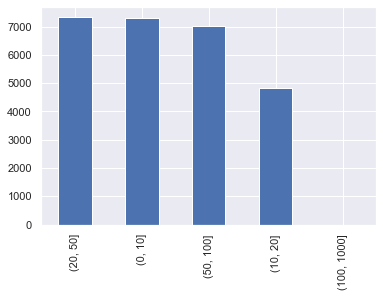

In [37]:
# Convert the size into bins then distribution of size in bins: code correct???
x = [0, 10,20,50,100,1000]
y = pd.cut(df['size'],x)
y.value_counts().plot(kind='bar')
plt.show()

As you can see, the sizes that within bin(20,50) are highest. ??? correct?? yes 

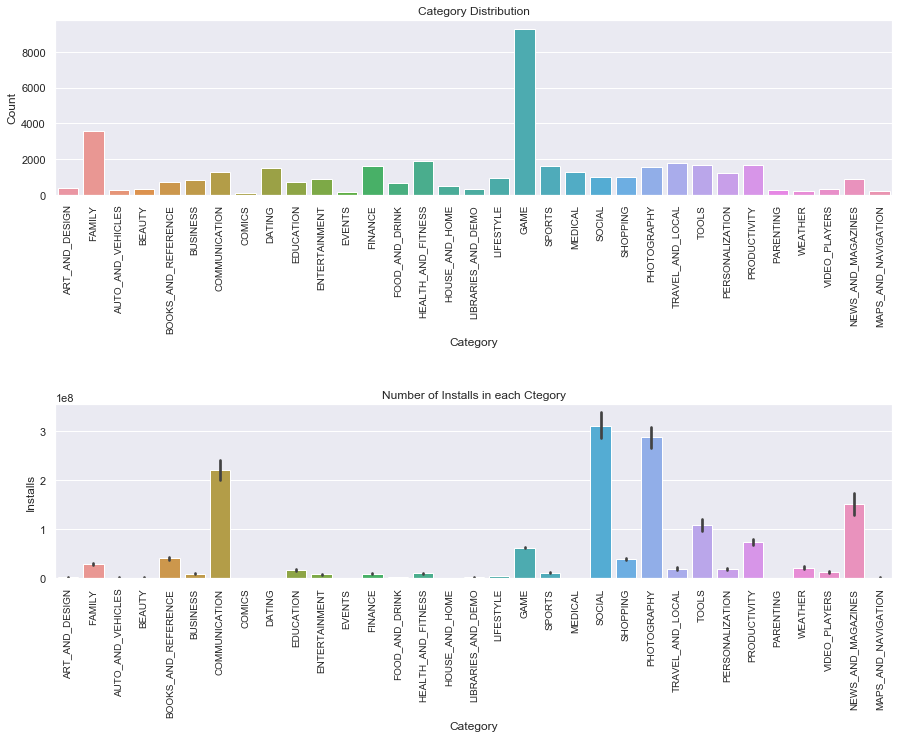

In [38]:
# Using countplot to better visualize counts of App in each category:
plt.figure(figsize = (15,10))

plt.subplot(211)
g = sns.countplot('category', data=df)
g.set(xlabel='Category', ylabel='Count', title='Category Distribution')
plt.xticks(rotation=90, fontsize=10)
# Use barplot to see Installs distribution by category:
plt.subplot(212)
g = sns.barplot(x='category', y='installs', data=df)
g.set(xlabel='Category', ylabel='Installs', title='Number of Installs in each Ctegory')
plt.xticks(rotation=90, fontsize=10)

plt.subplots_adjust(hspace = 1.2, top = 0.9)
plt.show()

Category of GAME has a highest number of Apps and SOCIAL Category has a highest average number of Installs.
??? countplot act like count values and barplot like mean?? yes 

In [39]:
# Top 10 App Distribution:
df.app.value_counts().sort_values(ascending=False).head(10)

8 Ball Pool                       672
Helix Jump                        558
Angry Birds Classic               535
Bowmasters                        485
Bubble Shooter                    450
Google Photos                     404
Clash Royale                      384
Calorie Counter - MyFitnessPal    297
Adobe Acrobat Reader              294
DRAGON BALL LEGENDS               291
Name: app, dtype: int64

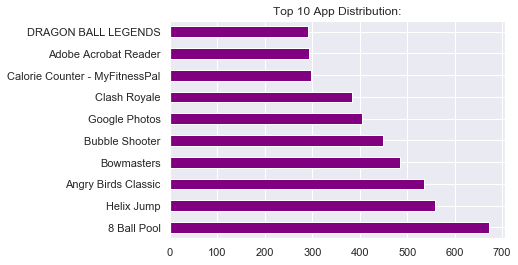

In [40]:
# Using barhplot for displaying Top 10 App Distribution:
df.app.value_counts().sort_values(ascending=False).head(10).plot(kind='barh', color='purple', title='Top 10 App Distribution:')
plt.show()

'8 Ball Pool' App has highest download rate than other Apps.???? correct???

In [41]:
# Top 20 of App and Rating sort by total number of installs:
df.groupby(['app', 'rating'])[['installs', 'reviews', 'price','size']].sum().sort_values(by="installs",ascending=False).head(20)

,,installs,reviews,price,size
app,rating,,,,
Google Photos,4.5,404000000000,4.385807e+09,0.0,0.0
Facebook,4.1,260000000000,2.031725e+10,0.0,0.0
Hangouts,4.0,160000000000,5.471064e+08,0.0,0.0
Google News,3.9,120000000000,1.053337e+08,0.0,1560.0
Candy Crush Saga,4.4,100000000000,4.485380e+09,0.0,14800.0
Gmail,4.3,80000000000,3.683523e+08,0.0,0.0
Google,4.4,76000000000,6.100944e+08,0.0,0.0
8 Ball Pool,4.5,67200000000,9.541075e+09,0.0,34944.0
Dropbox,4.4,57000000000,2.121716e+08,0.0,6954.0


In [42]:
# Top 20 of App by sorting total number of installs:
df.groupby('app')[['installs', 'reviews', 'price','size']].sum().sort_values(by="installs",ascending=False).head(20)

,installs,reviews,price,size
app,,,,
Google Photos,404000000000,4.385807e+09,0.0,0.0
Facebook,260000000000,2.031725e+10,0.0,0.0
Hangouts,160000000000,5.471064e+08,0.0,0.0
Google News,120000000000,1.053337e+08,0.0,1560.0
Candy Crush Saga,100000000000,4.485380e+09,0.0,14800.0
Gmail,80000000000,3.683523e+08,0.0,0.0
Google,76000000000,6.100944e+08,0.0,0.0
8 Ball Pool,67200000000,9.541075e+09,0.0,34944.0
Gboard - the Google Keyboard,57000000000,2.117925e+08,0.0,0.0


In [43]:
# Get statistical information summary of installs, reviews, price, size columns for app column:
df.groupby('app')[['installs', 'reviews', 'price','size']].describe().head(5)

installs                   \
                                                    count        mean  std   
app                                                                          
10 Best Foods for You                                95.0    500000.0  0.0   
11st                                                 39.0  10000000.0  0.0   
1800 Contacts - Lens Store                           40.0   1000000.0  0.0   
1LINE – One Line with One Touch                      38.0  10000000.0  0.0   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif     29.0  10000000.0  0.0   

                                                                          \
                                                         min         25%   
app                                                                        
10 Best Foods for You                               500000.0    500000.0   
11st                                              10000000.0  10000000.0   
1800 Contacts - Lens Store                         1000000.0   1000000.0   
1LINE – One Line with One Touch                   10000000.0  10000000.0   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif  10000000.0  10000000.0   

                                                                          \
                                                         50%         75%   
app                                                                        
10 Best Foods for You                               500000.0    500000.0   
11st                                              10000000.0  10000000.0   
1800 Contacts - Lens Store                         1000000.0   1000000.0   
1LINE – One Line with One Touch                   10000000.0  10000000.0   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif  10000000.0  10000000.0   

                                                             reviews  \
                                                         max   count   
app                                                                    
10 Best Foods for You                               500000.0    95.0   
11st                                              10000000.0    39.0   
1800 Contacts - Lens Store                         1000000.0    40.0   
1LINE – One Line with One Touch                   10000000.0    38.0   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif  10000000.0    29.0   

                                                            ... price       \
                                                      mean  ...   75%  max   
app                                                         ...              
10 Best Foods for You                               2490.0  ...   0.0  0.0   
11st                                               48732.0  ...   0.0  0.0   
1800 Contacts - Lens Store                         23160.0  ...   0.0  0.0   
1LINE – One Line with One Touch                   214878.0  ...   0.0  0.0   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif  115773.0  ...   0.0  0.0   

                                                  size                      \
                                                 count  mean           std   
app                                                                          
10 Best Foods for You                             95.0   3.8  6.696677e-15   
11st                                              39.0  20.0  0.000000e+00   
1800 Contacts - Lens Store                        40.0  26.0  0.000000e+00   
1LINE – One Line with One Touch                   38.0  10.0  0.000000e+00   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif   0.0   NaN           NaN   

                                                                                
                                                   min   25%   50%   75%   max  
app                                                                             
10 Best Foods for You                              3.8   3.8   3.8   3.8   3.8  
11st                                              20.0 

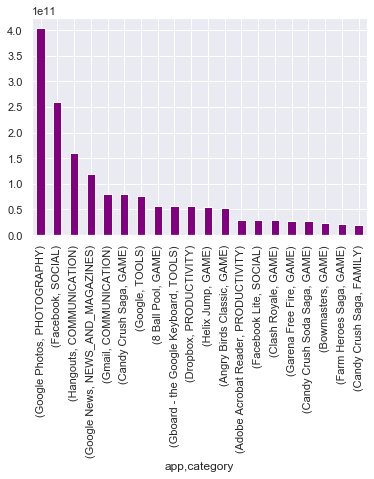

In [44]:
# Using barplot to display top 20 of App and Category by total number of Installs:
df.groupby(['app', 'category']).installs.sum().sort_values(ascending=False).head(20).plot(kind='bar', color='purple')

Highest total number of Installs is for 'Google Photos' App in 'PHOTOGRAPHY' category.

In [45]:
# Top 10 of Genres Distribution:
df.groupby('genres').app.count().sort_values(ascending=False).head(10)

genres
Action              3158
Sports              2192
Health & Fitness    1887
Travel & Local      1747
Casual              1707
Tools               1662
Productivity        1655
Finance             1581
Photography         1528
Arcade              1492
Name: app, dtype: int64

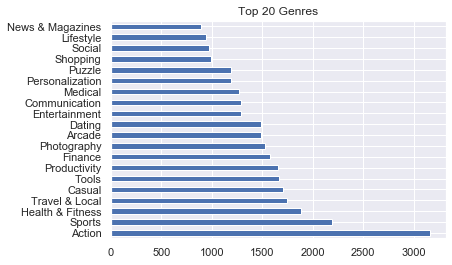

In [46]:
# Top 20 of Genres Distribution:
df.genres.value_counts().sort_values(ascending=False).head(20).plot(kind="barh", title="Top 20 Genres")

Action Genres has a highest number of App.

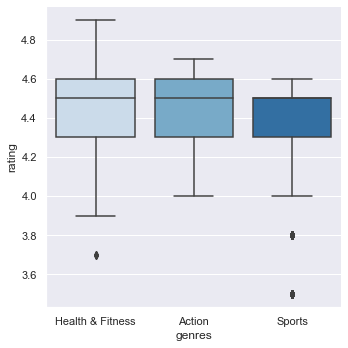

In [47]:
# Using boxplot to look at the distribution of 3 top number of Installs of Genres by Rating.
sns.catplot(x='genres', y='rating', kind='box', palette = 'Blues',  data=df[df.genres.isin(['Action', 'Sports', 'Health & Fitness'])])

As you can see, Health & Fitness has wide range of Rating.???correct?? yes 

In [48]:
# Top 10 total number of Installs in each Category:
df.groupby('category').installs.sum().sort_values(ascending=False).head(10)

category
GAME                  583365400000
PHOTOGRAPHY           440368500000
SOCIAL                303926100000
COMMUNICATION         283781000000
TOOLS                 179841500000
NEWS_AND_MAGAZINES    135566300000
PRODUCTIVITY          122603300000
FAMILY                106623890000
SHOPPING               39419000000
TRAVEL_AND_LOCAL       34103300000
Name: installs, dtype: int64

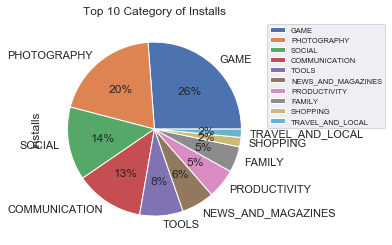

In [49]:
# Using Piechart to see Top 10 Category of Installs:
df.groupby('category').installs.sum().sort_values(ascending=False).head(10).plot(kind='pie',  title='Top 10 Category of Installs', autopct='%1.0f%%')
labels=df.groupby('category').installs.sum().sort_values(ascending=False).head(10).index
plt.legend(labels=labels, loc="upper left", prop={'size': 7.5}, bbox_to_anchor=(1,1))
plt.show()

Total number of installs is in GAME Category.

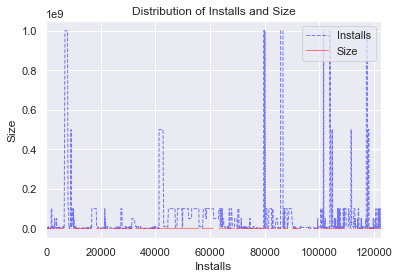

In [50]:
# Using the line plot to compare number of Installs and Size:
df['installs'].plot(kind = 'line', color = 'blue', label = 'Installs', linewidth=1, alpha = 0.5, grid = True, linestyle = '--')
df['size'].plot(kind = 'line', color = 'red', label = 'Size', linewidth=1, alpha = 0.5, grid = True, linestyle = '-')
plt.legend(loc='upper right')     
plt.xlabel('Installs')              
plt.ylabel('Size')
plt.title('Distribution of Installs and Size')            
plt.show()

??? analyze is correct??
Most of the Apps  have installed are lower Size.???  I wont plot like this. I might do scatter since both are numerical or I will do bar plot if one of them is categorical and the other is numerical  

In [ ]:
# Using the scatter plot to visualize the relationship between Installs and Size:
# (Because both are numeric values use scatterplot if one numeric one categorical use bar plot)
df.plot(kind='scatter', x='installs', y='size', alpha = 0.5, color='purple')
plt.xlabel('Installs')              
plt.ylabel('Size')
plt.title('Distribution of Installs and Size')  

??? how to analyze ??
as you can see, Apps have installed with different size and no correlation between them????????????????????? 

In [2]:
# By using lmplot to compare Rating and Reviews:
g = sns.lmplot(x='rating', y='reviews', data=df, fit_reg= False, scatter_kws={'alpha':0.4}) 
g.set(xlabel='Rating', ylabel='Reviews', title='Compare Rating and Reviews')
plt.show()

g = sns.lmplot(x='rating', y='reviews', data=df, fit_reg=True, scatter_kws={'alpha':0.4})
g.set(xlabel='', ylabel='', title='Compare Rating and Reviews with reg')
plt.show()

NameError: name 'sns' is not defined

As you can see higher Rating has higher number of Reviews.???correct???? act like count??? yes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

<Figure size 1800x1080 with 0 Axes>

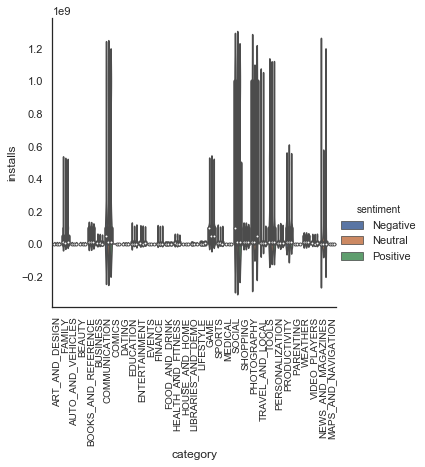

In [52]:
# Using violinplot to distribution of Category and Installs by sentiment :

sns.set(style="white")
plt.figure(figsize=(25,15))

sns.catplot(x="category", y='installs', hue="sentiment", kind="violin", split=False, data=df)
plt.xticks(rotation=90, fontsize=10)

In [53]:
df.groupby(['category', 'sentiment']).installs.max().sort_values(ascending=False).head(5)

category            sentiment
NEWS_AND_MAGAZINES  Negative     1000000000
TOOLS               Neutral      1000000000
PHOTOGRAPHY         Neutral      1000000000
                    Positive     1000000000
COMMUNICATION       Positive     1000000000
Name: installs, dtype: int64

In [3]:
# Using violinplot to distribution of top 5 Category and Installs by sentiment :

sns.set(style="white")
plt.figure(figsize=(25,15))

sns.catplot(x="category", y='installs', hue="sentiment", kind="violin", split=False,data=df[df.category.isin(df.category.value_counts().sort_values(ascending=False).head(5).index)] )
plt.xticks(rotation=90, fontsize=10)

NameError: name 'sns' is not defined

as you can see TOOLS has highest number of Installs range in all type of sentiment. Also, Game category has highest average number of Installs for Negative sentiment.

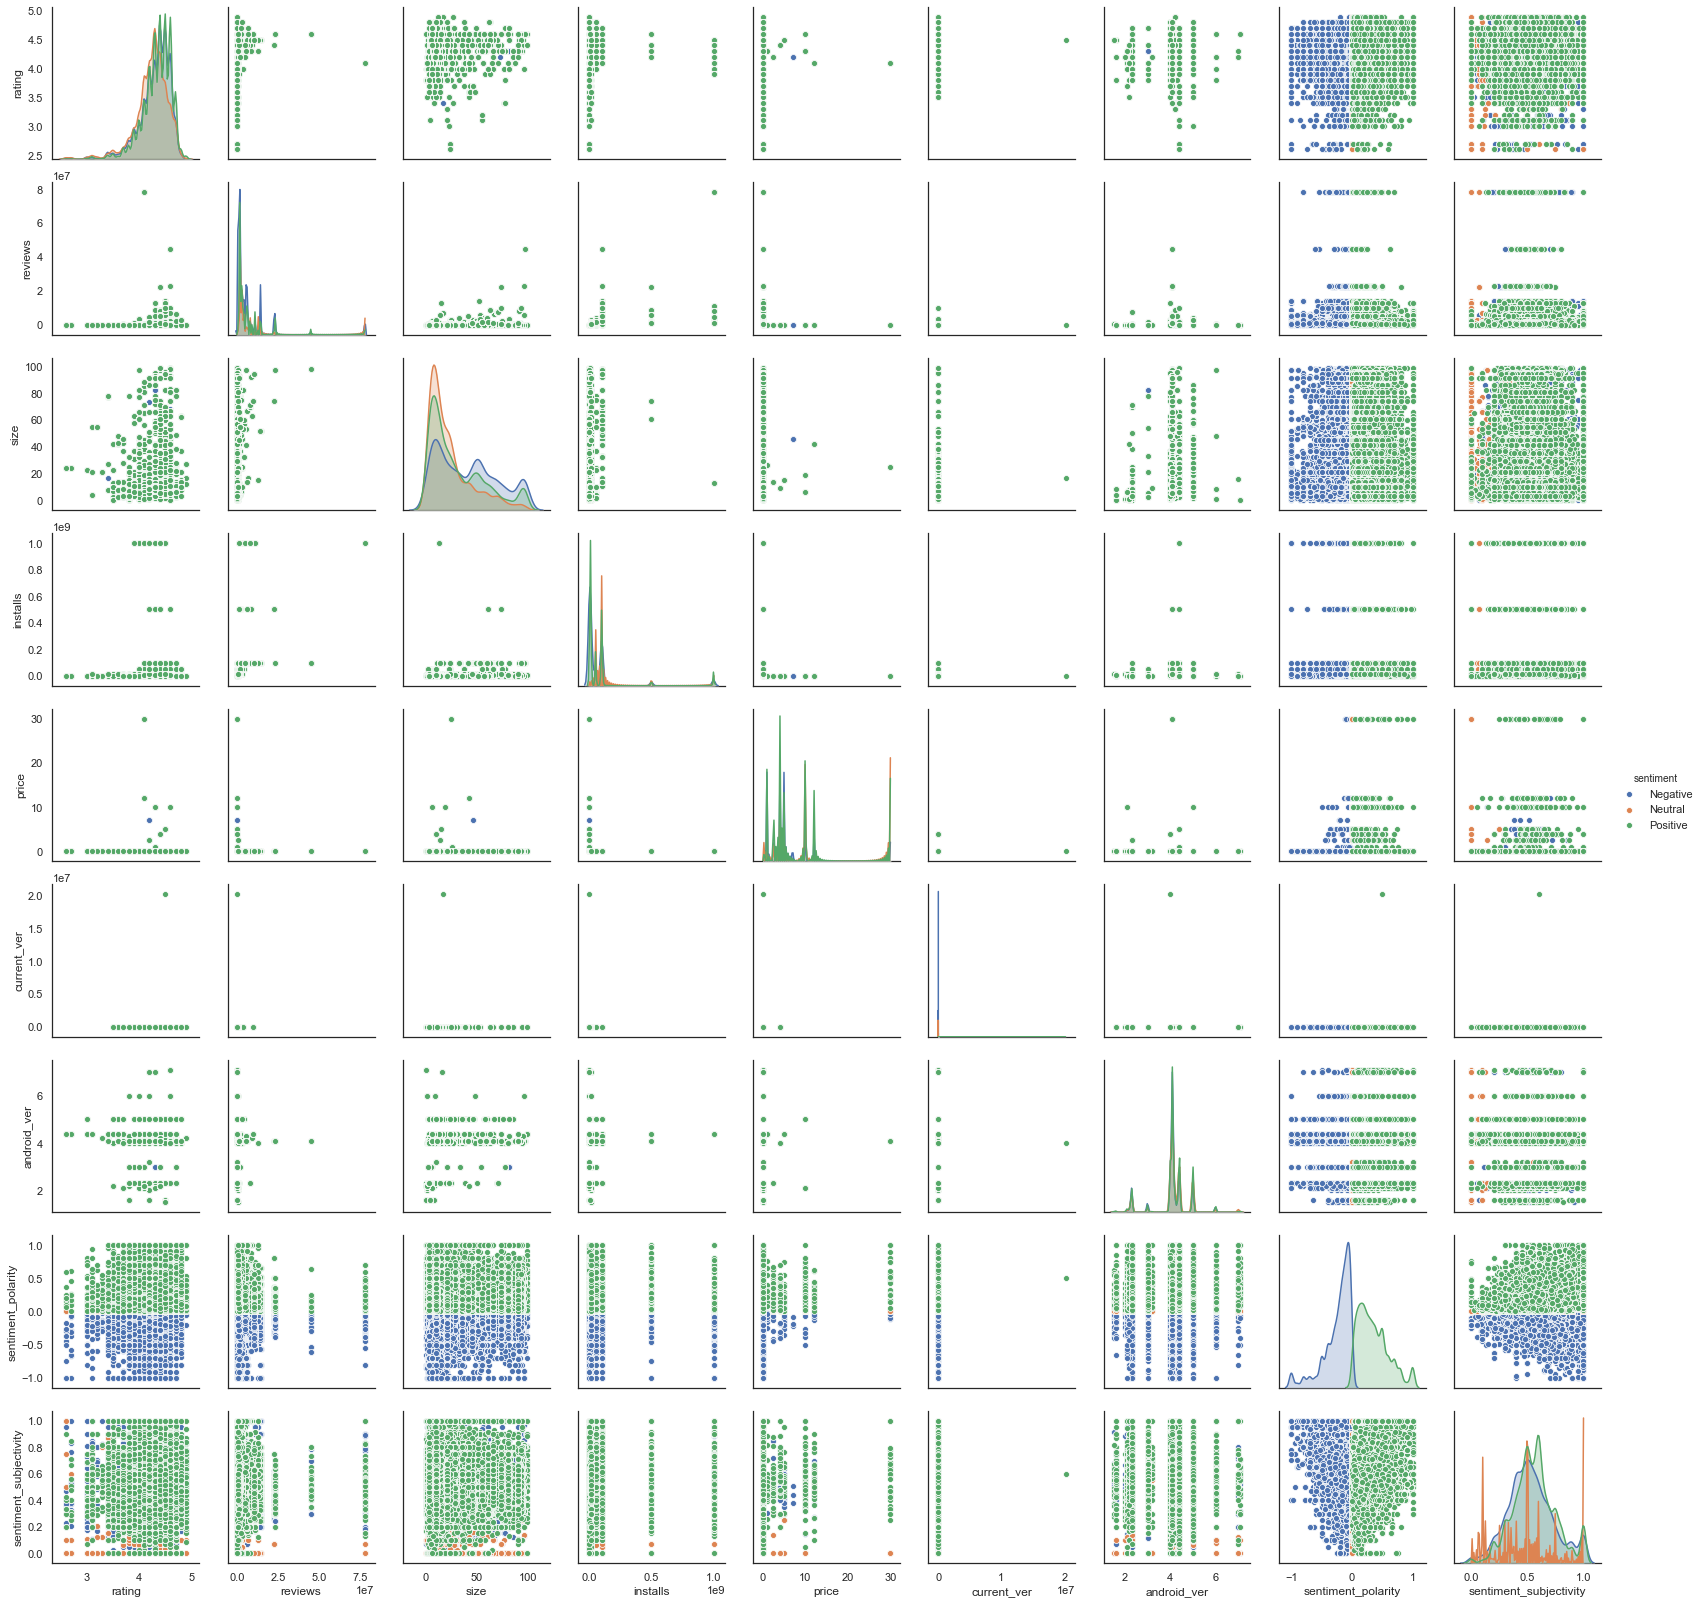

In [54]:
# Using pairplot to demonstrate the sentiment in the dataset: 
sns.pairplot(data=df, hue="sentiment")

In [55]:
# ???how to describe pairchart???? i didnt know i have to start from where and how to describe??  
### for sentiment polarity obviously sentiment postive vs negative would be very different. But for neutral the sentiment 
### subjectivity is very different from postive/negative. Looks like size, rating. install, price have less variablity between different 
### sentiment 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

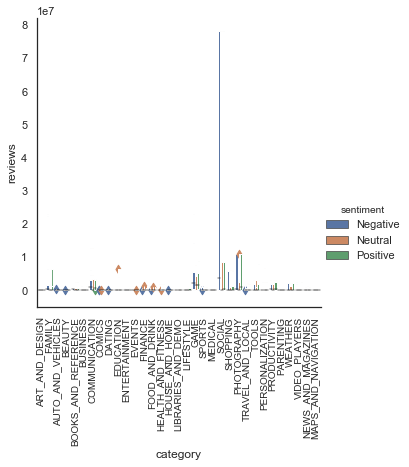

In [43]:
# Using boxenplot to distribution of Android Ver and Installs by Sentiment:
### I didnt get any error 


sns.set(style="white")
plt.figure(figsize=(20,15))

sns.catplot(x="category", y="reviews", hue="sentiment", kind="boxen", data=df)
plt.xticks(rotation=90, fontsize=10)

As you can see, SOCIAL category has highest number of reviews in all type of sentiment.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

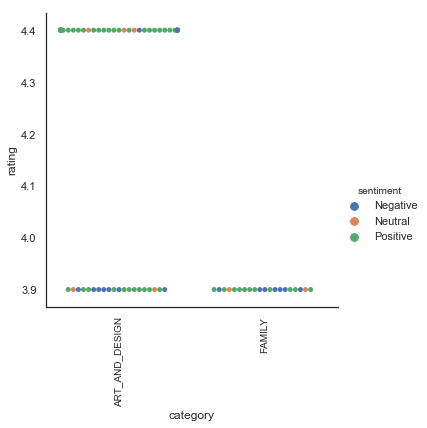

In [45]:
# ???? why get error??
# Using swarmplot to distribution of Category and Price by Type:

## it takes too long, so I'm only taking first 100 rows but I didnt get any error 
sns.set(style="white")
plt.figure(figsize=(25,15))

sns.catplot(x="category", y="rating", hue="sentiment", kind="swarm", data=df.iloc[:100, :])
plt.xticks(rotation=90, fontsize=10)

In [ ]:
# Using swarmplot to distribution of Category and Price by Type: for installs > 200,000,000:
sns.set(style="white")
plt.figure(figsize=(25,15))

sns.catplot(x="category", y="rating", hue="sentiment", kind="swarm", data=df[df.rating>4.0])
plt.xticks(rotation=90, fontsize=10)

As you can see, most of the App's category in rating>=3.9 have Positive sentiment.???? correct??

In [57]:
# Find top 10 reviews in each category and type.
df.groupby(['category', 'type']).reviews.max().sort_values(ascending=False).head(10)

category         type
SOCIAL           Free    78158306.0
GAME             Free    44893888.0
FAMILY           Free    44881447.0
SPORTS           Free    14184910.0
COMMUNICATION    Free    12843436.0
TOOLS            Free    12759815.0
PHOTOGRAPHY      Free    10859051.0
PERSONALIZATION  Free     6702776.0
EDUCATION        Free     6290507.0
SHOPPING         Free     6012719.0
Name: reviews, dtype: float64

<Figure size 1800x1080 with 0 Axes>

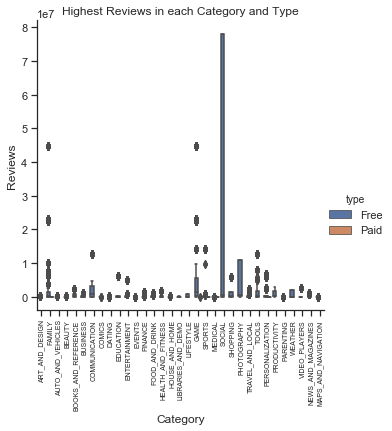

In [58]:
# Using boxplot to distribution of reviews in each Category:
sns.set(style='ticks')
plt.figure(figsize=(25,15))

g=sns.catplot(x='category', y='reviews', hue='type', kind='box', data=df)
g.set(xlabel='Category', ylabel='Reviews', title='Highest Reviews in each Category and Type')
plt.xticks(rotation=90, fontsize=7)
plt.show()

????As you can see, SOCIAL category has a highest number of reviews in Free type. ???? analyze is correct???? Act like max?? yes 

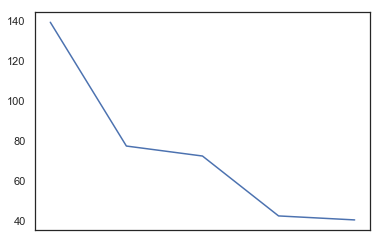

In [57]:
a.value_counts().plot()

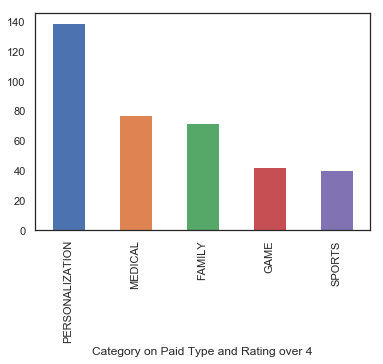

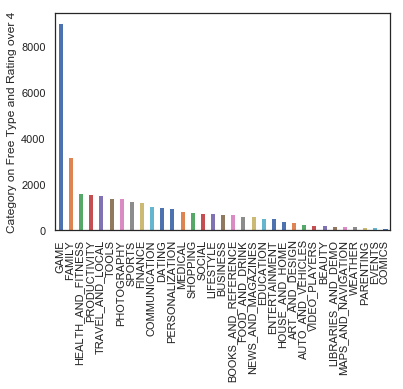

In [62]:
#??? why the Graph like this not CLEAR? the compare is incorrect??? 
a = df.loc[(df['type']=='Paid')&(df['rating']> 4.0),'category']
b = df.loc[(df['type']=='Free')&(df['rating']>4.0),'category']

a.value_counts().plot(kind='bar')
plt.xlabel('Category on Paid Type and Rating over 4') 
plt.show()
b.value_counts().plot(kind='bar')
plt.ylabel('Category on Free Type and Rating over 4')
plt.show()

#plt.figure(figsize=(25,10))
# plt.hist(a, density=True, bins=6, alpha=.5, label='Category on Paid Type and Rating over 4') 
# plt.hist(b, density=True, bins=6, alpha=.5, label='Category on Free Type and Rating over 4')
# plt.title('Category Distribution on Type and Rating over 4')
# plt.xlabel('Category on Paid Type and Rating over 4')
# plt.ylabel('Category on Free Type and Rating over 4')
# plt.xticks(rotation=90, fontsize=10)
# plt.show() 

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.countplot(x= a)
plt.title('Category on Paid Type and Rating over 4')

plt.subplot(2,1,2)
sns.countplot(x=b)
plt.title('Category on Free Type and Rating over 4')
plt.xticks(rotation=90)
plt.show()

PERSONALIZATION  and GAME category has highest number of Apps for Rating over 4.0 in Paid  and Free type Respectively.


In [65]:
df.loc[(df['type']=='Paid')&(df['installs']>(df.installs.mean())),'category'] 

# as you can see c is null that's why it's not working. 

Series([], Name: category, dtype: object)

AttributeError: Unknown property density

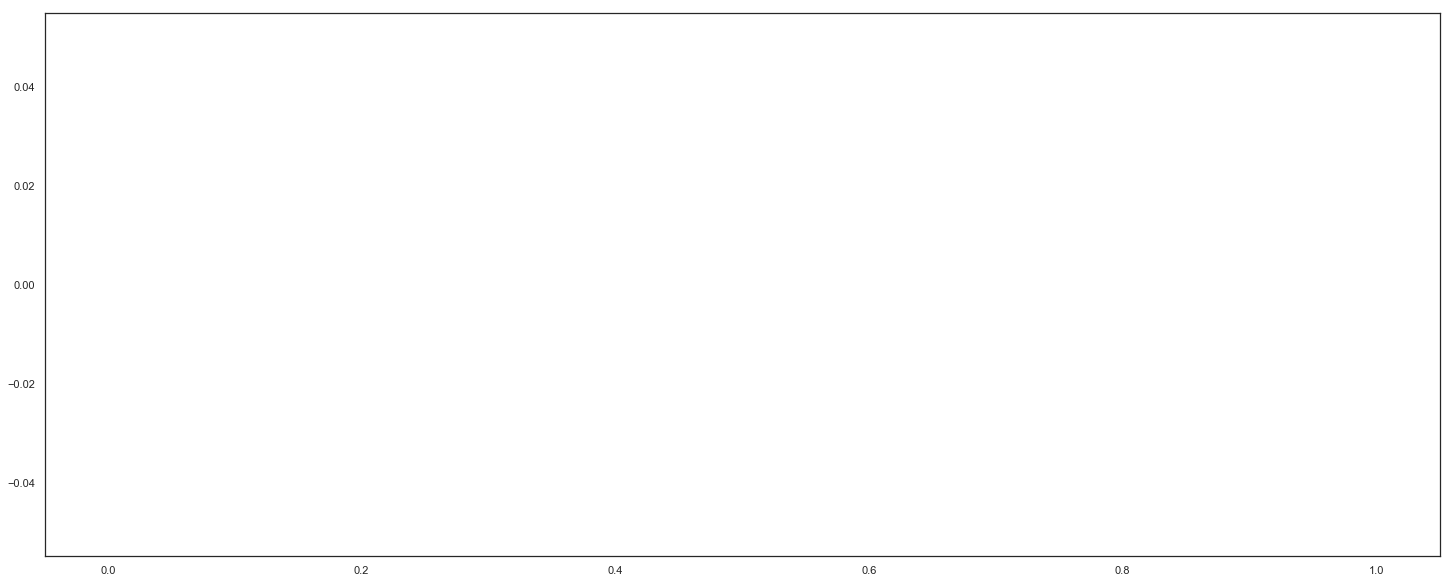

In [63]:
# ???why the Graph like this? the compare is incorrect??? #
c = df.loc[(df['type']=='Paid')&(df['installs']>(df.installs.mean())),'category'] 
d = df.loc[(df['type']=='Free')&(df['installs']>(df.installs.mean())),'category']

plt.figure(figsize=(25,10))
plt.hist(c, density=True, bins=6, alpha=.5, label='Category on Paid Type and Installs over Installs mean')
plt.hist(d, density=True, bins=6, alpha=.5, label='Category on Free Type and Rating over Installs mean')

plt.title('Category Distribution based on Type and Rating over 4')
plt.xlabel('Category on Paid Type and Installs over Installs mean')
plt.ylabel('Category on Free Type and Installs over Installs mean')
plt.xticks(rotation=90, fontsize=9)

plt.show()

<Figure size 1800x720 with 0 Axes>

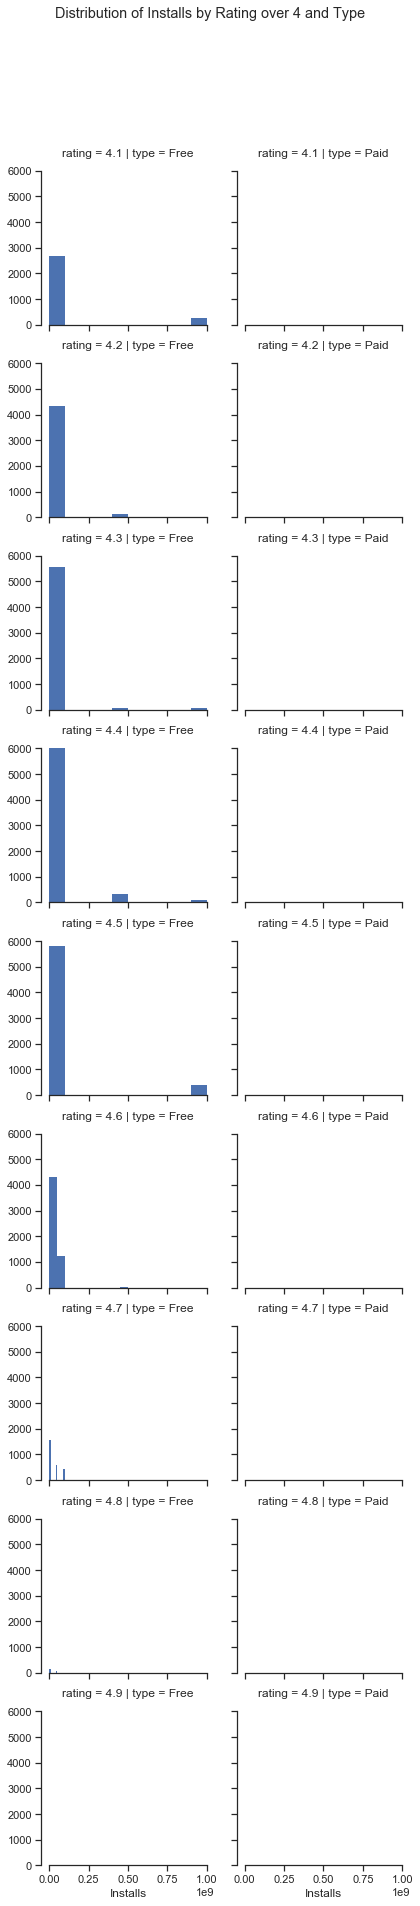

In [60]:
# Distribution of Installs by rating over 4 and type:
# df.groupby([(df.rating>4.0), 'type']).installs.count()
sns.set(style="ticks") 
plt.figure(figsize=(25,10))

g = sns.FacetGrid(df[df.rating>4.0], row="rating", col="type")
g.map(plt.hist, 'installs',label = 'Installs', lw=0)

plt.subplots_adjust(top=0.9)
g.set_axis_labels('Installs')
plt.suptitle('Distribution of Installs by Rating over 4 and Type')

sns.despine(trim=True)
plt.show()

????As you can see, the Highest number of Installs is for Rating around 4.5 and Free type.??? analyze is correct???

<Figure size 1800x720 with 0 Axes>

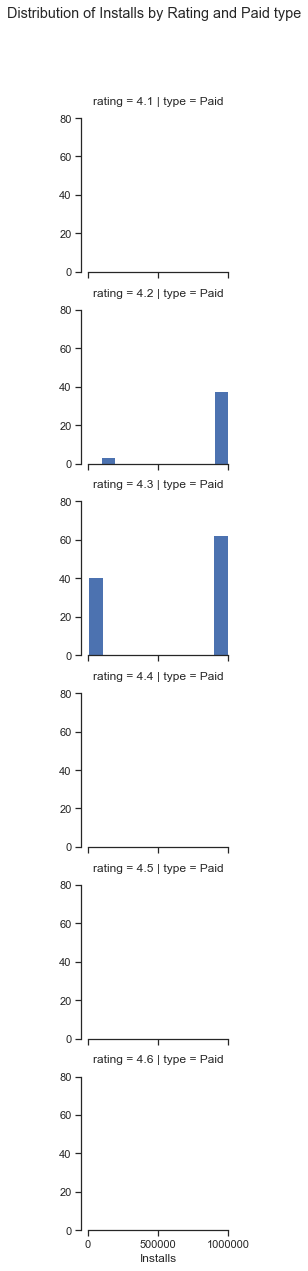

In [61]:
# Distribution of Installs by Rating and Paid type:
sns.set(style="ticks") 
plt.figure(figsize=(25,10))

g = sns.FacetGrid(df[df.type=='Paid'], row="rating", col="type")
g.map(plt.hist, 'installs',label = 'Installs', lw=0)

plt.subplots_adjust(top=0.9)
g.set_axis_labels('Installs')
plt.suptitle('Distribution of Installs by Rating and Paid type')

sns.despine(trim=True)
plt.show()

????As you can see, the Higher number of Installs is for Rating around 4.3 and 4.4 and Paid type.??? analyze is correct??? yes  

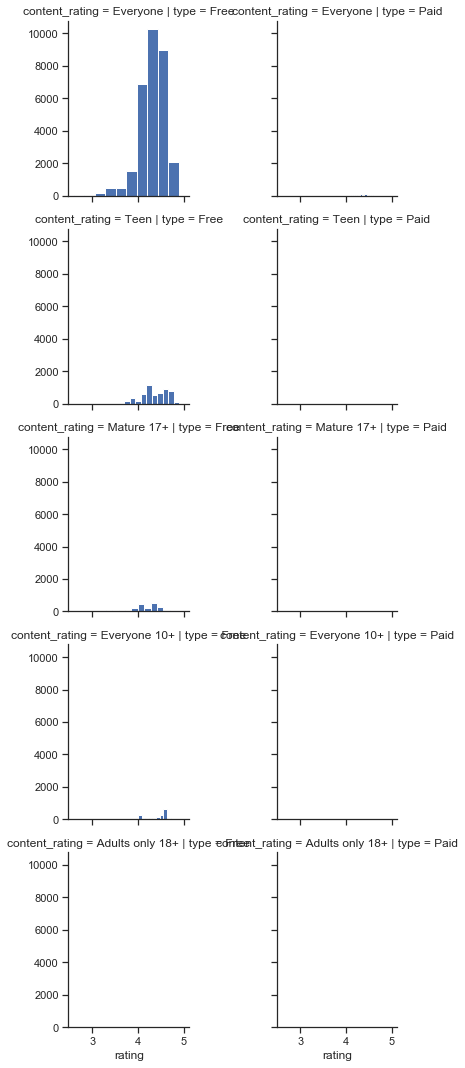

In [65]:
# Distribution of Rating by Type and Content Rating:
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(df, col="type", row="content_rating")
g = g.map(plt.hist, "rating")

The Everyone content rating with free type has highest Rating.

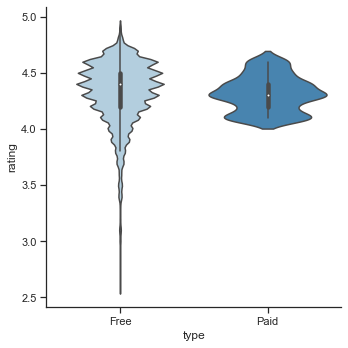

In [66]:
# Using catplot to visualize distribution of type and rating:
sns.catplot(x='type', y='rating', kind='violin',palette = 'Blues',  data=df)

The Free type of apps have more average rating than the Paid.

In [67]:
# Top 5 highest Rating category and type:
df.groupby(['category', 'type']).rating.max().sort_values(ascending=False).head(5)

category             type
AUTO_AND_VEHICLES    Free    4.9
HEALTH_AND_FITNESS   Free    4.9
MAPS_AND_NAVIGATION  Free    4.8
TOOLS                Free    4.8
MEDICAL              Free    4.8
Name: rating, dtype: float64

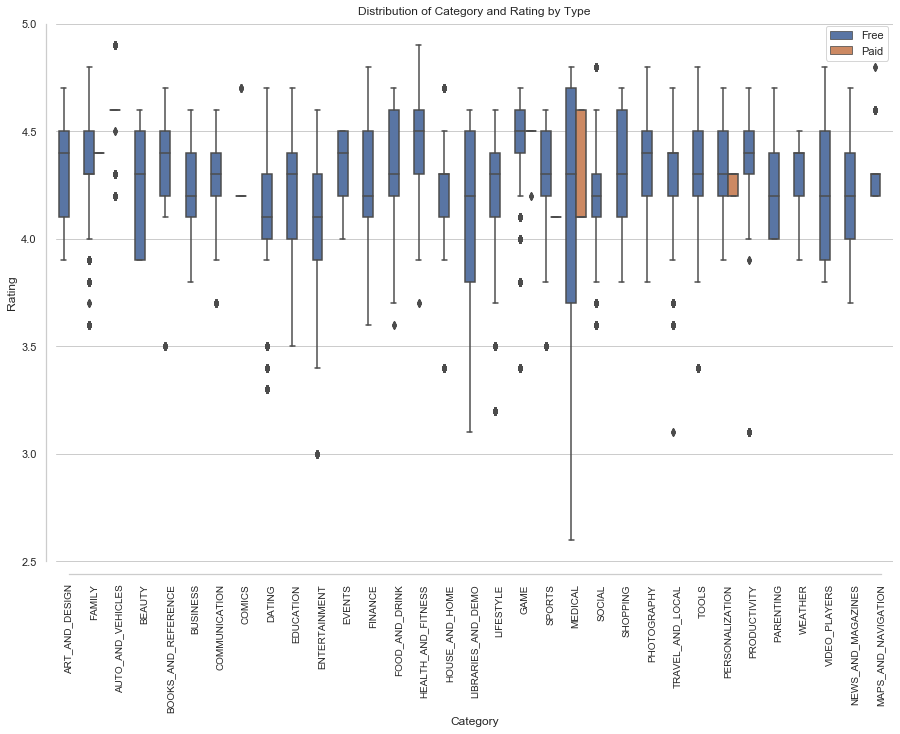

In [68]:
# Using boxplot to display range of Rating in each category and Type:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))

ax = sns.boxplot(x='category',y='rating',hue='type',data=df)  

plt.title('Distribution of Category and Rating by Type')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Category', ylabel='Rating')
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc="upper right")


plt.show()

???The highest Rating of Category is for AUTO_AND_VEHICLES in Free Type and the widest Rating of category is for MEDICAL category in Free type.???? is correct??? act like max??? yes 

In [69]:
# Top 5 mean of installs in each category and type:
df.groupby(['category', 'type']).installs.mean().sort_values(ascending=False).head(5)

category            type
SOCIAL              Free    3.117191e+08
PHOTOGRAPHY         Free    2.881993e+08
COMMUNICATION       Free    2.203269e+08
NEWS_AND_MAGAZINES  Free    1.511330e+08
TOOLS               Free    1.082079e+08
Name: installs, dtype: float64

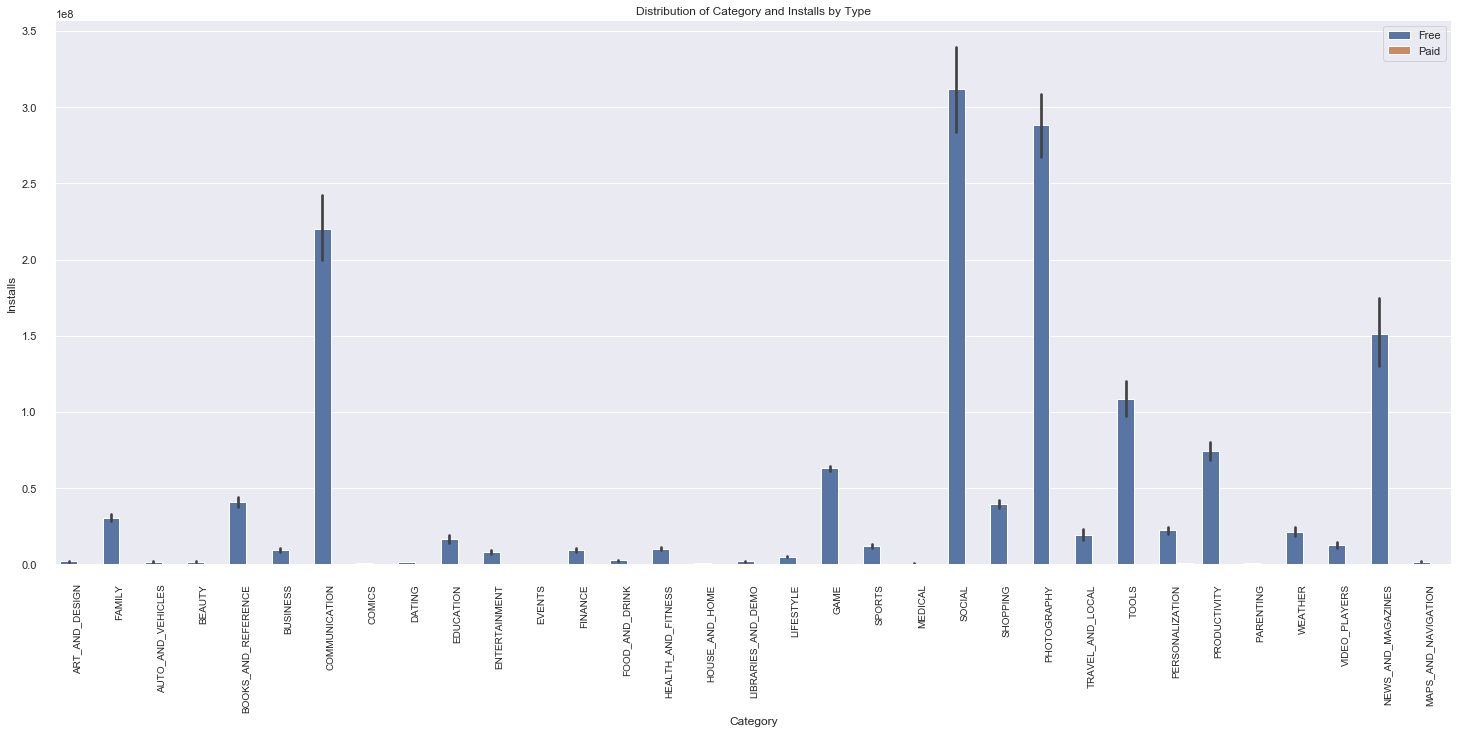

In [70]:
# Using barplot to distribution of average installs in each category and type:
sns.set(style="darkgrid")
plt.figure(figsize=(25,10))

ax = sns.barplot(x='category', y='installs', hue='type', data=df)  

plt.title('Distribution of Category and Installs by Type')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Category', ylabel='Installs')
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc="upper right")

plt.show()

???SOCIAL category has highest average number of installs in Free type.???? correct???act like mean?? yes 

<Figure size 2160x1080 with 0 Axes>

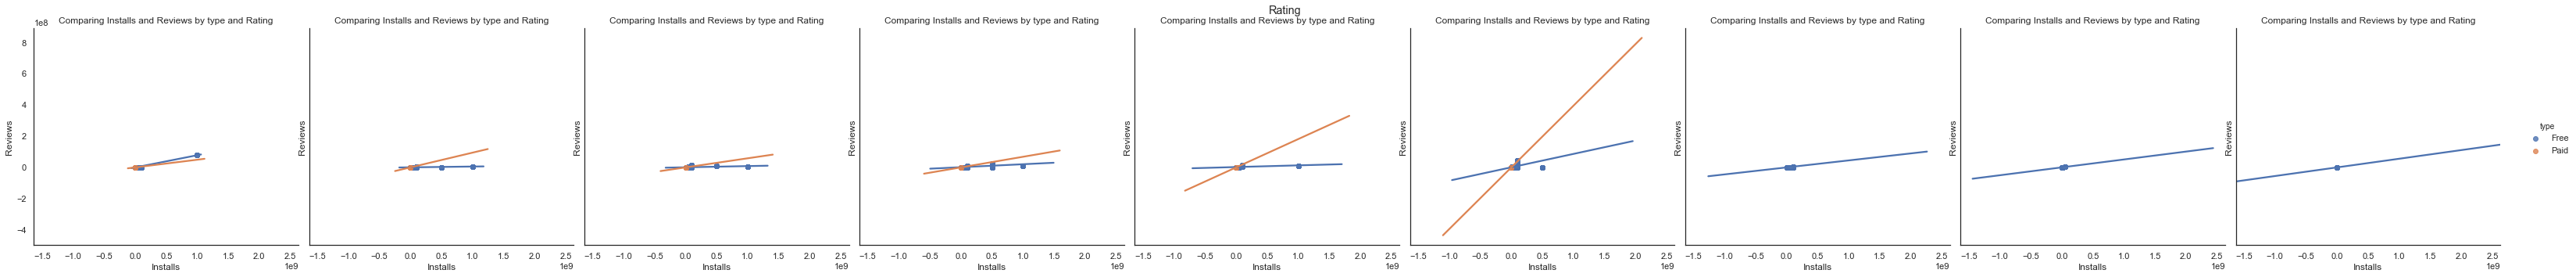

In [71]:
# this code is correct and meaningful? how to show only rate > 0.4????? No it doesn't tell you anything 
sns.set(style="white")
plt.figure(figsize=(30,15))

g = sns.lmplot(x='installs', y='reviews', hue='type', data=df[df.rating>4.0], col='rating', fit_reg=True, ci=False)

g.set(xlabel='Installs', ylabel='Reviews', title='Comparing Installs and Reviews by type and Rating')
plt.suptitle('Rating')
plt.subplots_adjust(top=0.9)
plt.show()

???? how to analyze this gragh????


In [68]:
# why get  error? operands could not be broadcast together with shapes (41036,) (29697,) what should i do???? ?????

sns.set(style="white")
plt.figure(figsize=(20,15))

sns.relplot(x="category", y="rating", col="sentiment", hue="type", size="reviews", style="type", kind="scatter", data=df)

g.set(xlabel='Category', ylabel='Rating')
plt.xticks(rotation=90, fontsize=9)
plt.show()


ValueError: could not convert string to float: ART_AND_DESIGN

Error in callback <function post_execute at 0x1145f9320> (for post_execute):


ValueError: could not convert string to float: ART_AND_DESIGN

ValueError: could not convert string to float: ART_AND_DESIGN

???how to rotate xlabel of two other chart??? 
??? how to analyze???  

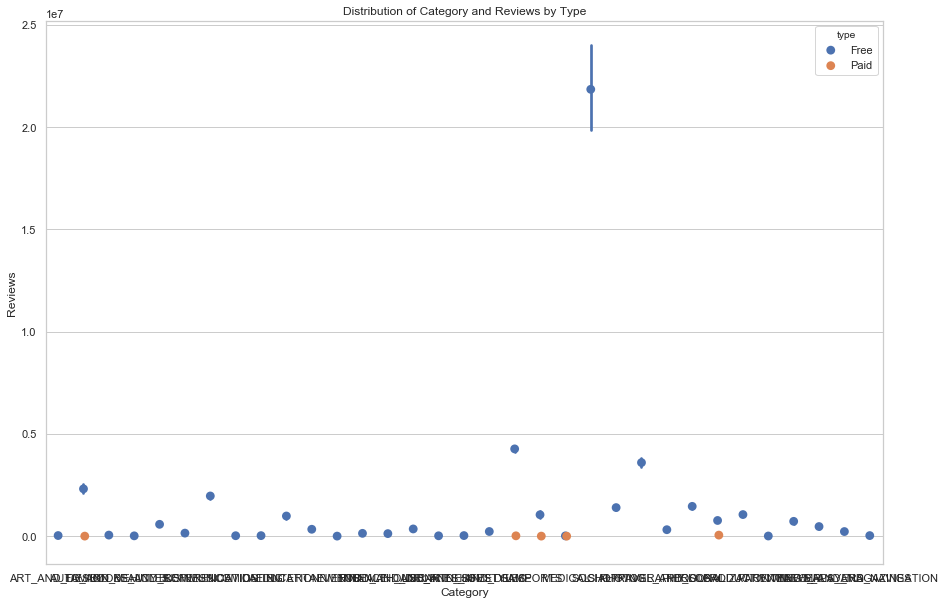

In [70]:
# why get this error?? ValueError: Invalid RGBA argument: masked????  Looks like matplotlib 3.1 is breaking a lot of things. You’ll have to downgrade for the time being. 
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

g = sns.pointplot(x="category", y="reviews", hue="type", data=df, kind="strip", dodge=True, join=False, scatter_kws={'alpha':0.4})
g.set(xlabel='Category', ylabel='Reviews', title='Distribution of Category and Reviews by Type')

plt.show()

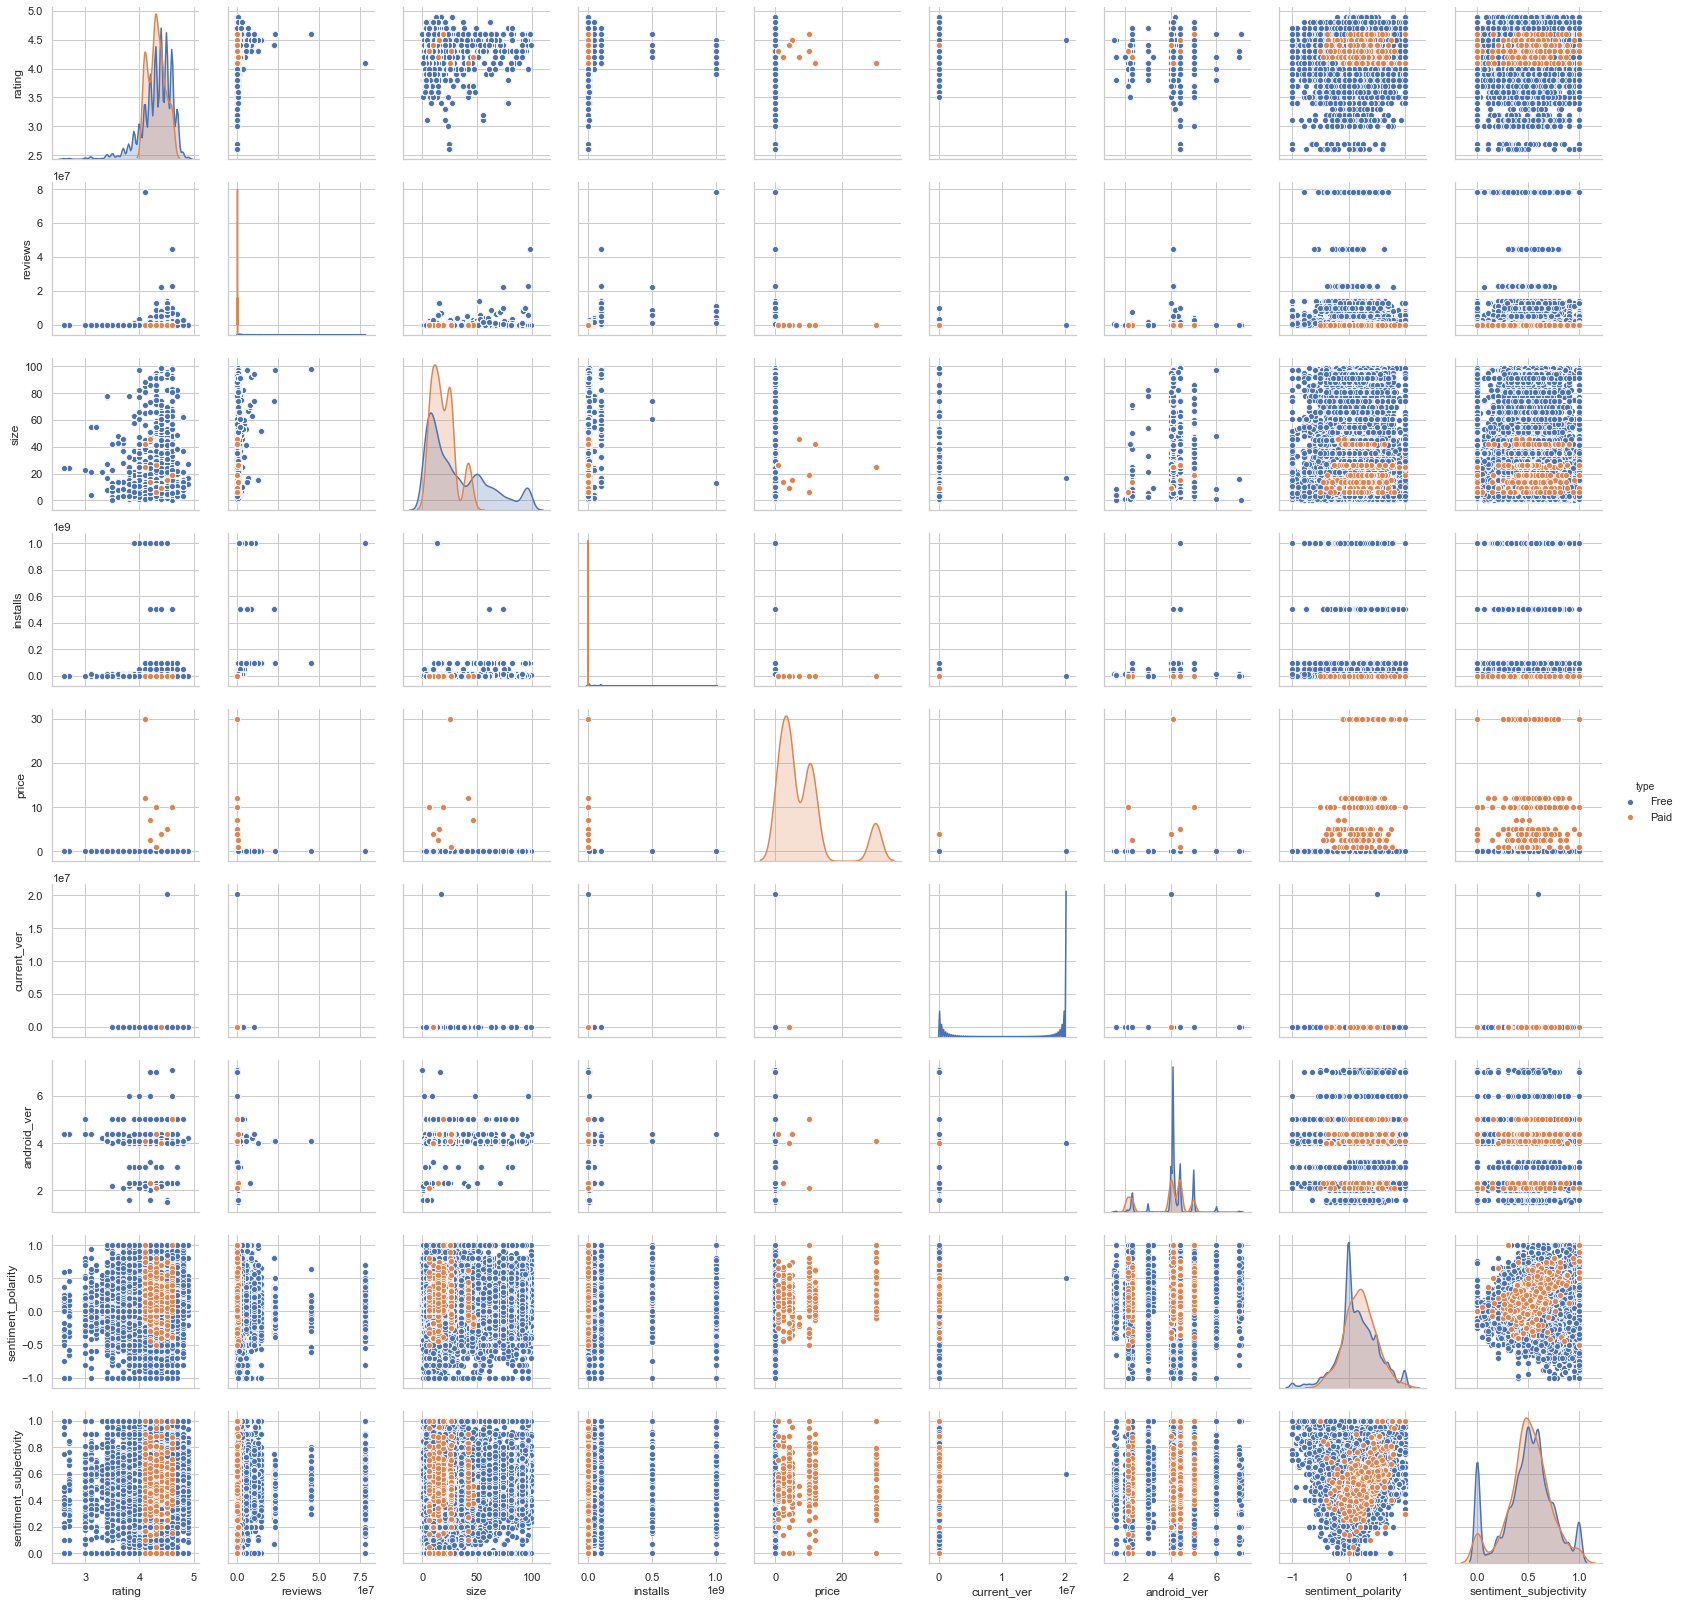

In [74]:
# Using pairplot to demonstrate the type in the dataset: 
sns.pairplot(data=df, hue="type")

???how to describe>?? ## see my comments above for the pairplot above 

Now, In the following steps, I am planning to evaluate the experiment plan and showing what constitutes success in this experiment.

In [88]:
# Using ttest to evaluate the hypothesis (success metrics):
ttest_ind(df[df.type=='Free'].rating, df[df.type!='Free'].rating)

Ttest_indResult(statistic=0.5516625304933648, pvalue=0.5811826393162001)

In the ttest, Pvalue is greater than 0.05 which means the difference is not significant between Free and Paid type Rating ???what should i do??????

In [71]:
# using ttest to evaluate the secondary metrics such as: Installs:
ttest_ind(df[df.type=='Free'].installs, df[df.type!='Free'].installs)

Ttest_indResult(statistic=6.62773865075955, pvalue=3.451483607449952e-11)

In the ttest, Pvalue is less than 0.05 which means the difference is significant between Free and Paid type Installs.

In [89]:
# using ttest to evaluate the secondary metrics such as: Reviews:
ttest_ind(df[df.type=='Free'].reviews, df[df.type!='Free'].reviews)

Ttest_indResult(statistic=5.64087910828089, pvalue=1.703138362124823e-08)

In the ttest Pvalue is greater than 0.05 means the difference is not significant between Free and Paid type Reviews.

Conclusion: 

Google Play store dataset were examined using Python and explor dataset and then present the hypothesis and below resutls can be drawn from the conducted analyses:
1.The average(mean) of Rating of App is 4.3. The average number of Installs of App is 5,9067,860. 

2.The GAME category and ACTION genres has more Apps. Also the number of Free apps and Positive sentiment is higher.

3.Highest number of Installs, Rating, Size, Current Ver, Android Ver and Content Rating are 10,000,000 ,4.1,97,2.9,4.1,Everyone respectively.

4.Highest average number of Installs for Content Rating, Category, Rating, Size are Teen, SOCIAL, 4.5, 74.0 respectively.

5.The App sizes that within bin(20,50) are highest.

6.Category of GAME has a highest number of Apps and SOCIAL Category has a highest average number of Installs.

7.'8 Ball Pool' App has highest download rate than other Apps.

8.Highest total number of Installs is for 'Google Photos' App in 'PHOTOGRAPHY' category.

9.Action Genres has a highest number of App.

10.Health & Fitness has wide range of Rating.

11.Total number of installs is in GAME Category.

12.SOCIAL category has highest number of reviews in all type of sentiment.

13.The Highest number of Installs is for Rating around 4.5 and Free type.

14.The highest Rating of Category is for AUTO_AND_VEHICLES in Free Type and the widest Rating of category is for MEDICAL category in Free type.

15.SOCIAL category has highest average number of installs in Free type.

16.


Future Works: 
    
More data can be added to the analysis to broaden conclusions such as data usage, tracking time consumtion,etc.

Also newers data can be helpful in drawing conclusions on some factors such as last updated, data usage, etc.

Quality of the data set could have been improved as well. 

Find the way to compare the data with Apple store. 

Analysis of the comments can be enriched to find the reason of low rating.